# CHAPTER 3 - KERAS SEQUENTIAL, FUNCTIONAL, SUB-CLASSING API

## Introduction

`keras` is the implementation of the [Keras API specification](https://keras.io)

In [1]:
import keras

keras.__version__

Using TensorFlow backend.


'2.3.1'

`tf.keras` is the TensorFlow's implementation of the [Keras API specification](https://keras.io)

`tf.keras` can run any Keras-compatible code.

Be careful that `tf.keras` version in the latest [TensorFlow](https://www.tensorflow.org/) release might not be the same as the latest `keras`version from [PyPi](https://pypi.org/).



In [2]:
import tensorflow as tf
from tensorflow import keras

keras.__version__

'2.3.0-tf'

## Keras Sequential API

### 1 - Create Sequential model


#### Solution 1 : By passing a list of layer instances as an array to the constructor

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential([
    # Add a densely-connected Layer with 32 units to the model
    tf.keras.layers.Dense(32, input_dim=256),
    # Add an activation layer with relu activation function
    tf.keras.layers.Activation('relu'),
    # Then Add another
    tf.keras.layers.Dense(32),
    tf.keras.layers.Activation('relu'),
    # Finally Add the output layers:
    # Add a densely-connected Layer with 10 units to the model
    # Add an activation layer with softmax activation function
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
])

Let's check out what the model summary looks like:

In [5]:
# Display Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                8224      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
______________________________________________________

#### Solution 2 : Instantiate a Sequential Class and after that adding layers via the .add() method

This code is strictly equivalent to the previous one.


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential()
# Add a densely-connected Layer with 32 units to the model
model.add(tf.keras.layers.Dense(32, input_dim=256))
# Add an activation layer with relu activation function
model.add(tf.keras.layers.Activation('relu'))
# Then Add another
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
# Finally Add the output layers: 
# Add a densely-connected Layer with 10 units to the model
# Add an activation layer with softmax activation function
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))


Let's check out what the model summary looks like:

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                8224      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
____________________________________________________

### 2 - Configuring the layers

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

Add an `activation function` which decides, whether a neuron should be activated or not

In [10]:
# Create a relu layer:
Dense(128, activation='relu')
# Or:
Dense(128, activation=tf.keras.activations.relu)

Define a `kernel_initializer` and a `bias_initializer` which are the initialization schemes that create the layer's weights (kernel and bias).  

In [11]:
# A linear layer with a kernel initialized to a random orthogonal matrix:
Dense(64, kernel_initializer='orthogonal')
 
# A linear layer with a bias vector initialized to 2.0:
Dense(64, bias_initializer=tf.keras.initializers.Constant(value=2))
 

Define `kernel_regularizer` and `bias_regularizer` which are regularizers allow to apply penalties on layer parameters or layer activity during optimization

In [12]:
# A linear layer with L1 regularization of factor 0.02 applied to the kernel matrix:
Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.02))
 
# A linear layer with L2 regularization of factor 0.02 applied to the bias vector:
Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.02))
 

### 3 - Specifying the input shape



In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, LSTM

#### 3-1 Using input_shape argument

The argument `input_shape` doesn't contain the `batch_size` because Keras ignores it. The model should be able to deal with any batch size.

In [14]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(256,256,3)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256, 256, 32)      128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


However, we can force the batch_size with the `batch_size` argument.

In [15]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(256,256,3), batch_size=50))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (50, 256, 256, 32)        128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


**For 2D Convolutional layers**

The ordering of the dimensions in the inputs depends on the argument `data_format`.
`channels_last` corresponds to inputs with shape (batch, steps, channels) (default format for temporal data in Keras)

In [0]:
# Channel must be specified at the end of the input_shape
model = tf.keras.Sequential()
model.add(Conv2D(filters=16, 
                 kernel_size=(2,2), 
                 data_format="channels_last", 
                 input_shape=(256, 256,3)))

In [0]:
# Channel must be specified at the beginning of the input_shape
model = tf.keras.Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), 
                 data_format="channels_first", 
                 input_shape=(3, 256, 256)))


**For 1D convolutions and recurrent layers** use input_shape=(batch_size, sequence_length, features)


In [0]:
# the length of the sequence is 50 and there are 3 features
model = tf.keras.Sequential()
model.add(Conv1D(32, kernel_size=2, input_shape=(50,3)))

#### 3-2 Using input_dim argument

`input_dim` is a scalar number. It’s used when your `input_shape` has only one dimension


In [19]:
model = tf.keras.Sequential()
model.add(Dense(32, input_dim=500))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                16032     
Total params: 16,032
Trainable params: 16,032
Non-trainable params: 0
_________________________________________________________________


This code is strictly equivalent to the previous one. The comma is necessary when you have only one dimension:


In [20]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(500,)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                16032     
Total params: 16,032
Trainable params: 16,032
Non-trainable params: 0
_________________________________________________________________


#### 3-3 Using `input_dim` and `input_length`

These arguments which are used in some temporal layers where input_shape = (input_length, input_dim)


In [21]:
model = tf.keras.Sequential()
model.add(LSTM(16, input_length= 50, input_dim =10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1728      
Total params: 1,728
Trainable params: 1,728
Non-trainable params: 0
_________________________________________________________________


This code is strictly equivalent to the previous one:

In [22]:
model = tf.keras.Sequential()
model.add(LSTM(16, input_shape= (50,10)))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1728      
Total params: 1,728
Trainable params: 1,728
Non-trainable params: 0
_________________________________________________________________


#### 3-4 Using `batch_size` argument to fix the batch size ***useful for stateful recurrent network***


In [23]:
model = tf.keras.Sequential()
model.add(LSTM(16, input_shape= (50,10), batch_size=64))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (64, 16)                  1728      
Total params: 1,728
Trainable params: 1,728
Non-trainable params: 0
_________________________________________________________________


#### 3-5 Using `batch_input_shape` argument to fix the `batch_size` and the `input_shape`



In [24]:
model = tf.keras.Sequential()
model.add(Dense(32, batch_input_shape=(64, 50, 10)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (64, 50, 32)              352       
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


### 4 - Compilation

In [0]:
# Build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile a model using stochastic gradient descent optimizer 
# for categorical cross entropy loss and categorical accuracy metric.
model.compile(optimizer='sgd',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Configure a model using adam optimizer
# for mean-squared error regression and mean absolute error metric.
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error

# Configure a model using RMSprop (root mean square) optimizer
# for categorical classification and accuracy metric.
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 5 - Training

Training from Numpy data :

In [26]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 10))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))


Epoch 1/10
32/32 [==============================] - 0s 10ms/step - loss: 11.5762 - accuracy: 0.1070 - val_loss: 11.6470 - val_accuracy: 0.0900
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5771 - accuracy: 0.1210 - val_loss: 11.7191 - val_accuracy: 0.1400
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5761 - accuracy: 0.1140 - val_loss: 11.6631 - val_accuracy: 0.1900
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 11.5761 - accuracy: 0.1060 - val_loss: 11.6672 - val_accuracy: 0.0900
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 11.5810 - accuracy: 0.1120 - val_loss: 11.6626 - val_accuracy: 0.1200
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 11.5856 - accuracy: 0.1250 - val_loss: 11.6905 - val_accuracy: 0.1000
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5835 - accuracy: 0.1220 - val_loss: 11.7891 - val_accuracy: 0.1300
Epoch

Training from tf.data.datasets:

In [27]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

model.fit(dataset, epochs=10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 4ms/step - loss: 11.6185 - accuracy: 0.0990
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5878 - accuracy: 0.1260
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 11.5831 - accuracy: 0.1360
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5893 - accuracy: 0.1410
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 11.5893 - accuracy: 0.1400
Epoch 6/10
32

### 6 - Evaluation and Predict

Evaluate Returns the loss value & metrics values for the model in test mode.

In [28]:
# Evaluation with Numpy arrays
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model.evaluate(data, labels, batch_size=32)


32/32 [==============================] - 0s 3ms/step - loss: 11.5664 - accuracy: 0.1180


[11.566423416137695, 0.11800000071525574]

In [29]:
# Evaluation with a Dataset
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

model.evaluate(dataset)


32/32 [==============================] - 0s 3ms/step - loss: 11.5664 - accuracy: 0.1180


[11.566423416137695, 0.11800000071525574]

In [30]:
# Prediction
result = model.predict(data, batch_size=32)
print(result.shape)

(1000, 10)


## Keras functional API



### 1 - Create a Functional model

The deep learning model is usually a directed acyclic graph (DAG). The `Functional API` is a way to build a graph of layers and to create more flexible models than the `tf.keras.Sequential` API.


To build a model, multiple layers are stacked. A layer instance is callable (on a tensor) and returns a tensor.

Let's go and make out a functional model for recognizing [MNIST data](http://yann.lecun.com/exdb/mnist/).

#### Load MNIST dataset


In [0]:
mnist = tf.keras.datasets.mnist
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = mnist.load_data()


#### Normalize the grayscale image

In [0]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    image_data_min = image_data.min()
    image_data_max = image_data.max()
    return a + ((image_data - image_data_min)*(b-a))/(image_data_max - image_data_min)

train_mnist_features = normalize_grayscale(X_mnist_train)
test_mnist_features = normalize_grayscale(X_mnist_test)


#### Build the model

We add 1 flatten layer and 2 dense layers in order to do a classification task between 10 classes.

The goal is to predict the digit written on each image (from 0 to 9).

In [33]:
# Input() is used to instantiate a Keras tensor.
inputs = tf.keras.Input(shape=(28,28))

# Flatten the images of size (28,28) to have an array of 784 pixels
flatten_layer = keras.layers.Flatten()

# And we add a new node in the graph of layers 
# by calling a flatten layer on the inputs object :
flatten_output = flatten_layer(inputs)

#Then, we create a new layer instance :
dense_layer = tf.keras.layers.Dense(50, activation='relu')
# Add a new node
dense_output = dense_layer(flatten_output)

predictions = tf.keras.layers.Dense(10, activation='softmax')(dense_output)

# The model instance formalizes the computational graph 
# on how the data flows from input(s) to output(s).
model = keras.Model(inputs=inputs, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


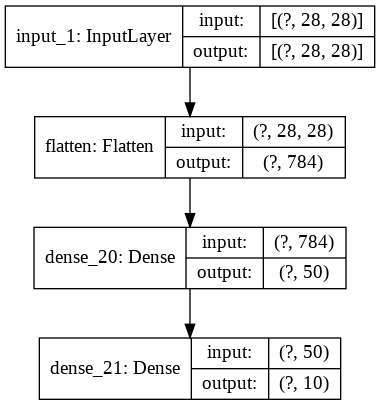

In [34]:
keras.utils.plot_model(model, 'funct_model_mnist.png', show_shapes=True)


#### Compile and Fit the model
Such a model can be trained and evaluated by the same compile, fit, evaluate and predict methods used in the Keras Sequential model. 

In [35]:
# Compile
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_mnist_features, y_mnist_train, validation_data=(test_mnist_features, y_mnist_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8164 - accuracy: 0.7976 - val_loss: 0.4125 - val_accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3825 - accuracy: 0.8948 - val_loss: 0.3315 - val_accuracy: 0.9087
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3296 - accuracy: 0.9074 - val_loss: 0.2994 - val_accuracy: 0.9173
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.9145 - val_loss: 0.2805 - val_accuracy: 0.9218
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.9202 - val_loss: 0.2653 - val_accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9247 - val_loss: 0.2559 - val_accuracy: 0.9291
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2524 - accuracy: 0.9289 - val_loss: 0.2414 - val_accuracy:

### 2 - Use callable models like layers

If we’re facing a sequence problem, creating a model will become very easy with the Functional API. For example, instead of processing one image, we want to process a video which is composed of many images. We could turn an image classification model into a video classification in just one line using the TimeDistributed layer wrapper. This wrapper applies our previous model to every temporal slice of the input sequence, means, to each image of our video.



In [0]:
from keras.layers import TimeDistributed

# Input tensor for sequences of 50 timesteps,
# each containing a 28x28 dimensional matrix.
input_sequences = tf.keras.Input(shape=(10, 28, 28))

# Our previous model will be applied to every timestep in the input sequences.
# The output of the previous model was a 10-way softmax.
# So the output of the layer below will be a sequence of 50 vectors of size 10.
processed_sequences = tf.keras.layers.TimeDistributed(model)(input_sequences)


### 3 - Create a model with multiple inputs and outputs

Let’s go with an example. We’re going to build a system for predicting the price of a specific house and the elapsed time before the sales with multiple inputs and outputs.

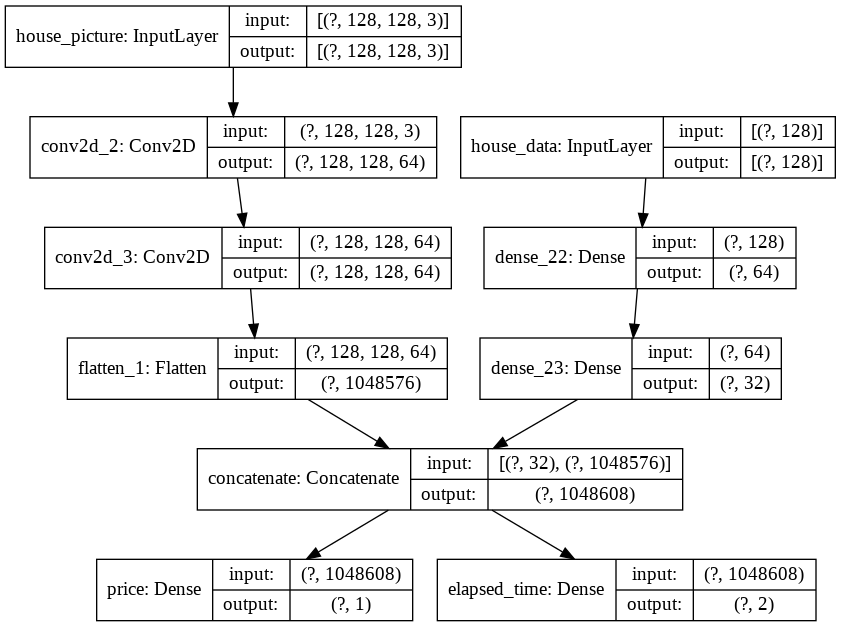

In [37]:
house_data_inputs = tf.keras.Input(shape=(128,), name='house_data')
x = tf.keras.layers.Dense(64, activation='relu')(house_data_inputs)
block_1_output = tf.keras.layers.Dense(32, activation='relu')(x)
 
house_picture_inputs = tf.keras.Input(shape=(128,128,3), name='house_picture')
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(house_picture_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = tf.keras.layers.Flatten()(x)
 
# Merge all available features into a single large vector via concatenation
x = tf.keras.layers.concatenate([block_1_output, block_2_output])

# Stick a logistic regression for price prediction on top of the features
price_pred = tf.keras.layers.Dense(1, name='price', activation='relu')(x)
# Stick a time classifier on top of the features
time_elapsed_pred = tf.keras.layers.Dense(2, name='elapsed_time', activation='softmax')(x)

 
model = keras.Model([house_data_inputs, house_picture_inputs], 
                    [price_pred, time_elapsed_pred], 
                    name='toy_house_pred')

keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

### 4 - Share Layers

Let’s consider two different sequences of text.

We will apply the same embedding layer to these two sequences that feature similar vocabulary.

In [0]:
# Variable-length sequence of integers
text_input_a = tf.keras.Input(shape=(None,), dtype='int32')

# Variable-length sequence of integers
text_input_b = tf.keras.Input(shape=(None,), dtype='int32')

# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = tf.keras.layers.Embedding(1000, 128)

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

### 5 - Extract and Reuse nodes in the graph of layers 
Take a look at how to read the shared layer’s output and output_shape

In [0]:
# Variable-length sequence of integers
text_input_a = tf.keras.Input(shape=(None,), dtype='int32')

# Variable-length sequence of integers
text_input_b = tf.keras.Input(shape=(None,), dtype='int32')

# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = tf.keras.layers.Embedding(1000, 128)

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [40]:
# Get Node 0 Output of shared embedding layer
print(shared_embedding.get_output_at(0))
# Get Node 1 Output of shared embedding layer
print(shared_embedding.get_output_at(1))

Tensor("embedding_1_1/Identity:0", shape=(None, None, 128), dtype=float32)
Tensor("embedding_1_2/Identity:0", shape=(None, None, 128), dtype=float32)


In [41]:
# Get Node 0 input shape of shared embedding layer
print(shared_embedding.get_input_shape_at(0))
# Get Node 1 input shape of shared embedding layer
print(shared_embedding.get_input_shape_at(1))

(None, None)
(None, None)


In [42]:
# Get Node 0 output shape of shared embedding layer
print(shared_embedding.get_output_shape_at(0))
# Get Node 1 output shape of shared embedding layer
print(shared_embedding.get_output_shape_at(1))

(None, None, 128)
(None, None, 128)


Let’s go to download the ResNet 50 pre-trained model

In [43]:
resnet = tf.keras.applications.resnet.ResNet50()
features_list = [layer.output for layer in resnet.layers]

# Display all the ouput layers
features_list

[<tf.Tensor 'input_7:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'conv1_pad/Identity:0' shape=(None, 230, 230, 3) dtype=float32>,
 <tf.Tensor 'conv1_conv/Identity:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'conv1_bn/Identity:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'conv1_relu/Identity:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'pool1_pad/Identity:0' shape=(None, 114, 114, 64) dtype=float32>,
 <tf.Tensor 'pool1_pool/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_1_conv/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_1_bn/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_1_relu/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_2_conv/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_2_bn/Identity:0' shape=(None, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'conv2_block1_2_relu/Identity

## Keras Sub-classing API

### 1 - Create a Custom Layer

In [0]:
class MyCustomDense(tf.keras.layers.Layer):
 
 def __init__(self, units=32):
   super(MyCustomDense, self).__init__()
   self.units = units
 
 def build(self, input_shape):
   self.w = self.add_weight(shape=(input_shape[-1], self.units),
                            initializer='random_normal',
                            trainable=True)
   self.b = self.add_weight(shape=(self.units,),
                            initializer='random_normal',
                            trainable=True)
 
 def call(self, inputs):
   return tf.matmul(inputs, self.w) + self.b
 
 def get_config(self):
   return {'units': self.units}

In [45]:
x = tf.ones((4,4))
my_custom_layer = MyCustomDense(2)
y = my_custom_layer(x)
print(y)

tf.Tensor(
[[0.07612086 0.11274562]
 [0.07612086 0.11274562]
 [0.07612086 0.11274562]
 [0.07612086 0.11274562]], shape=(4, 2), dtype=float32)


In [0]:
# Create a model with a MyCustomDense layer
inputs = keras.Input((4,4))
outputs = MyCustomDense(2)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

# Reload the model from the config
new_model = keras.Model.from_config(config, 
                                    custom_objects={'MyCustomDense': MyCustomDense})

### 2 - Create a Custom Model

In [0]:
class MyMNISTModel(tf.keras.Model):
  def __init__(self, num_classes):
    super(MyMNISTModel, self).__init__(name='my_mnist_model')
    self.num_classes = num_classes
    # Defining the layers
    self.flatten_1 = tf.keras.layers.Flatten()
    self.dense_1 = tf.keras.layers.Dense(50, activation='relu')
    self.dense_2 = tf.keras.layers.Dense(10, activation='softmax')
    self.dropout = tf.keras.layers.Dropout(0.1)
    
  def call(self, inputs, training=False):
    # In this method we define our forward pass using layers created in init
    x = self.flatten_1(inputs)
    if training:
      x = self.dropout(x, training=training)

    x = self.dense_1(x)
    return self.dense_2(x)
  
  def compute_output_shape(self, input_shape):
    # You need to override this function if you want to use the subclassed model
    # as part of a functional-style model.
    # Otherwise, this method is optional.
    shape = tf.TensorShape(input_shape).as_list()
    shape = [shape[0], self.num_classes]
    print(shape)
    return tf.TensorShape(shape)

In [0]:
my_mnist_model = MyMNISTModel(10)

In [49]:
# Compile
my_mnist_model.compile(optimizer='sgd',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train
my_mnist_model.fit(train_mnist_features, y_mnist_train, 
                   validation_data=(test_mnist_features, y_mnist_test), 
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8135 - accuracy: 0.7887 - val_loss: 0.4115 - val_accuracy: 0.8885
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4113 - accuracy: 0.8839 - val_loss: 0.3343 - val_accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3615 - accuracy: 0.8957 - val_loss: 0.3058 - val_accuracy: 0.9141
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.9019 - val_loss: 0.2899 - val_accuracy: 0.9193
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3160 - accuracy: 0.9082 - val_loss: 0.2738 - val_accuracy: 0.9228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.9131 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2848 - accuracy: 0.9176 - val_loss: 0.2474 - val_accuracy: